# Momentum Strength Analysis

In [ ]:
#default
ticker="MSFT"
start_date="2025-01-01"
end_date="2025-05-20"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [ ]:
print(f"Ticker: {ticker}")
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

In [ ]:
# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,416.976868,424.438202,413.261173,423.900262,16896500
2025-01-03,421.728607,422.405996,417.933202,419.467282,16662900
2025-01-06,426.211365,432.656586,423.850447,426.360784,20573600
2025-01-07,420.752350,429.000637,419.188356,427.356962,18139100
2025-01-08,422.933960,425.334733,419.925537,421.838167,15054600


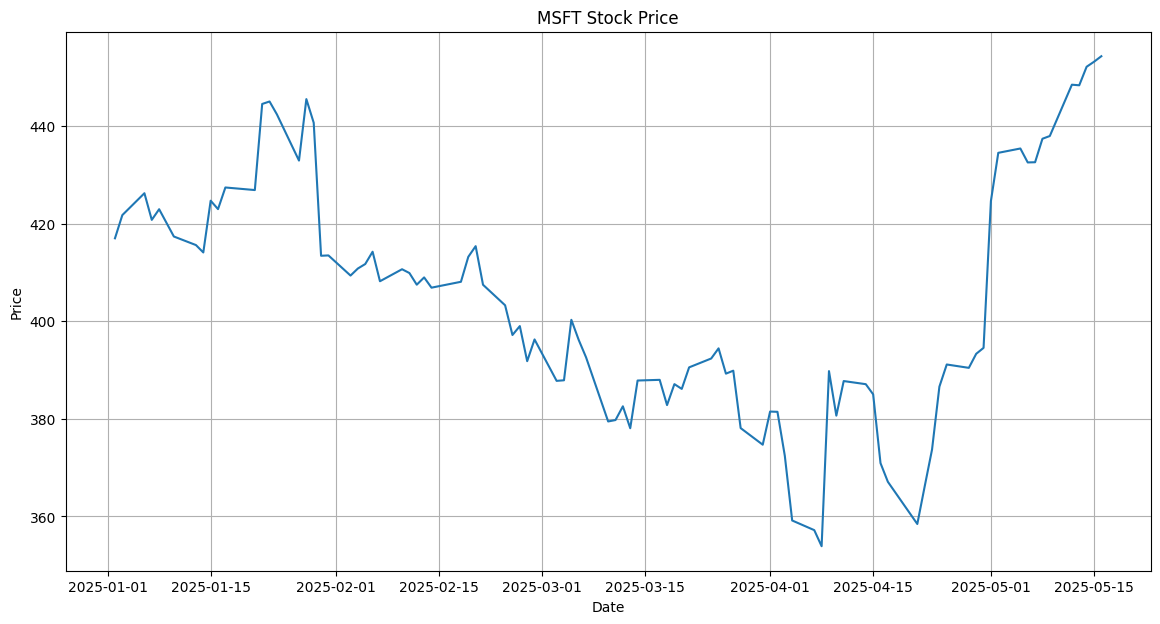

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Momentum Strength (ความแข็งแกร่งของโมเมนตัม):

- ความหมาย: Momentum Strength คือตัวชี้วัดที่ใช้ในการวิเคราะห์ทางเทคนิค เพื่อวัดความเร็วและความแรงของการเปลี่ยนแปลงราคาในช่วงเวลาที่กำหนด โดยจะแสดงให้เห็นว่าราคาหุ้นกำลังเคลื่อนที่ไปในทิศทางใด และมีความแข็งแกร่งมากน้อยแค่ไหน
- การคำนวณ:
    - Momentum Strength สามารถคำนวณได้หลายวิธี ขึ้นอยู่กับสูตรที่ใช้
    - วิธีที่ง่ายที่สุดคือการหาราคาปัจจุบัน ลบด้วยราคาย้อนหลังไป n ช่วงเวลา (เช่น 10 วัน หรือ 20 วัน)
    - Momentum Strength = ราคาปัจจุบัน - ราคาย้อนหลัง n วัน
- การตีความ:
    - ค่าเป็นบวก (Momentum Strength > 0): แสดงว่าราคาปัจจุบันสูงกว่าราคาย้อนหลัง ซึ่งบ่งบอกว่าราคาหุ้นมีโมเมนตัมเป็นบวก และมีโอกาสที่จะปรับตัวขึ้น
    - ค่าเป็นลบ (Momentum Strength < 0): แสดงว่าราคาปัจจุบันต่ำกว่าราคาย้อนหลัง ซึ่งบ่งบอกว่าราคาหุ้นมีโมเมนตัมเป็นลบ และมีโอกาสที่จะปรับตัวลง
    - ค่าเป็นศูนย์ (Momentum Strength = 0): แสดงว่าราคาปัจจุบันเท่ากับราคาย้อนหลัง ซึ่งบ่งบอกว่าราคาหุ้นไม่มีโมเมนตัม หรืออยู่ในช่วงพักตัว
- การใช้งาน:
    - ระบุแนวโน้ม:
        - เมื่อ Momentum Strength มีค่าเป็นบวกอย่างต่อเนื่อง แสดงว่าแนวโน้มเป็นขาขึ้น
        - เมื่อ Momentum Strength มีค่าเป็นลบอย่างต่อเนื่อง แสดงว่าแนวโน้มเป็นขาลง
    - วัดความแข็งแกร่งของแนวโน้ม:
        - ยิ่ง Momentum Strength มีค่าสูงมากเท่าไหร่ แนวโน้มก็จะยิ่งมีความแข็งแกร่งมากขึ้นเท่านั้น
    - หา Divergence (ความขัดแย้ง):
        - Bearish Divergence: ราคาทำจุดสูงสุดใหม่ แต่ Momentum Strength ไม่ทำจุดสูงสุดใหม่ (อาจเป็นสัญญาณว่าแนวโน้มขาขึ้นกำลังอ่อนตัวลง)
        - Bullish Divergence: ราคาทำจุดต่ำสุดใหม่ แต่ Momentum Strength ไม่ทำจุดต่ำสุดใหม่ (อาจเป็นสัญญาณว่าแนวโน้มขาลงกำลังอ่อนตัวลง)
    - หา Overbought และ Oversold:
        - เมื่อ Momentum Strength มีค่าสูงมาก อาจบ่งบอกถึงสภาวะ Overbought (ซื้อมากเกินไป)
        - เมื่อ Momentum Strength มีค่าต่ำมาก อาจบ่งบอกถึงสภาวะ Oversold (ขายมากเกินไป)

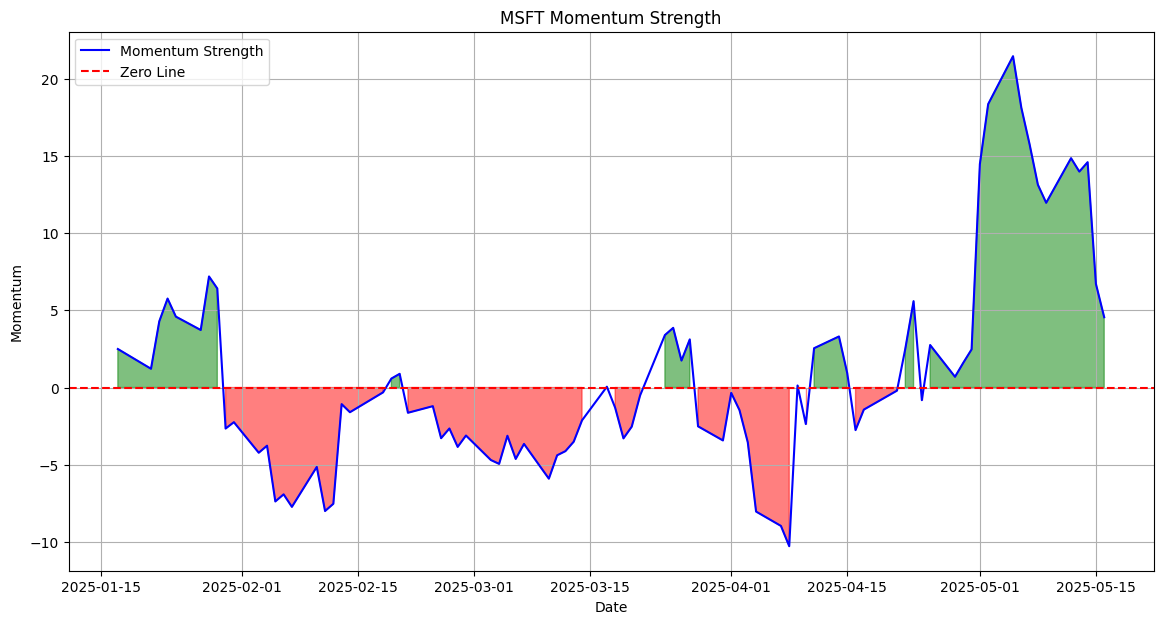

In [5]:
#Momentum Strength
data['MOM'] = ta.momentum.roc(data['Close'], window=10)
#plot the momentum strength
plt.figure(figsize=(14, 7))
plt.plot(data['MOM'], label='Momentum Strength', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.fill_between(data.index, data['MOM'], 0, where=(data['MOM'] > 0), color='green', alpha=0.5)
plt.fill_between(data.index, data['MOM'], 0, where=(data['MOM'] < 0), color='red', alpha=0.5)
plt.legend()
plt.title(f'{ticker} Momentum Strength')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.grid()
plt.show()